# Housing Price Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house_price = data['median_house_value']
house_price.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Bivariate Analysis

In [5]:
import matplotlib.pyplot as plt

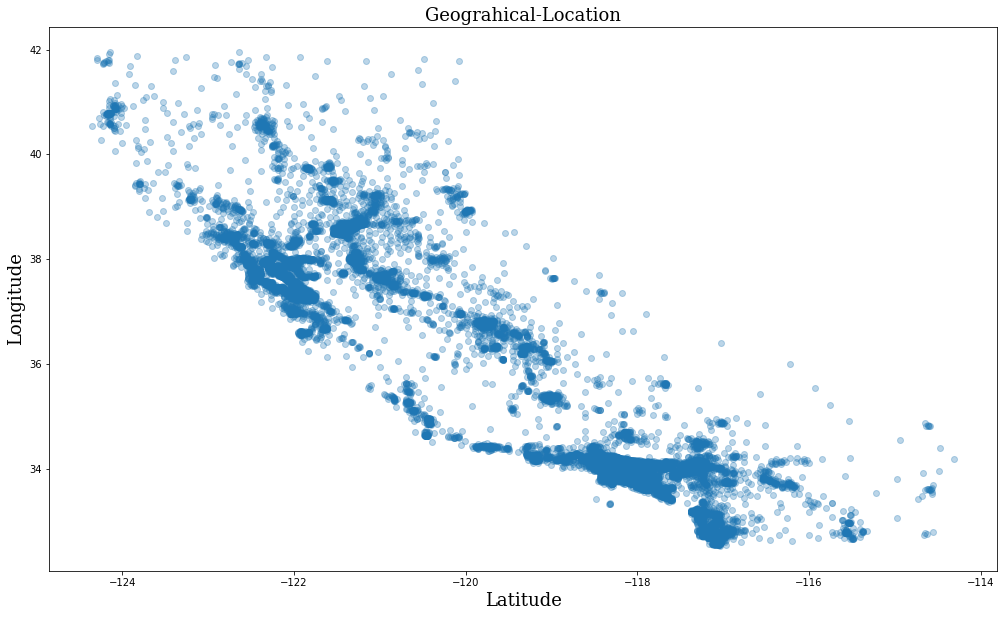

In [6]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(17, 10))
plt.scatter(x=data['longitude'], y=data['latitude'], alpha=0.3)
plt.xlabel('Latitude', fontdict=font_dict)
plt.ylabel('Longitude', fontdict=font_dict)
plt.title('Geograhical-Location', fontdict=font_dict)
plt.savefig('Visualization/1-Geographical-Location.png')
plt.show()

In [7]:
data['median_house_value'].corr(data['housing_median_age'])

0.10562341249321

## Multivariate Analysis

In [8]:
import seaborn as sns

In [9]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [10]:
data.drop(['total_bedrooms'], axis=1, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
new_data = data[['longitude','latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'median_house_value']]

In [12]:
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [13]:
correlation = new_data.corr()

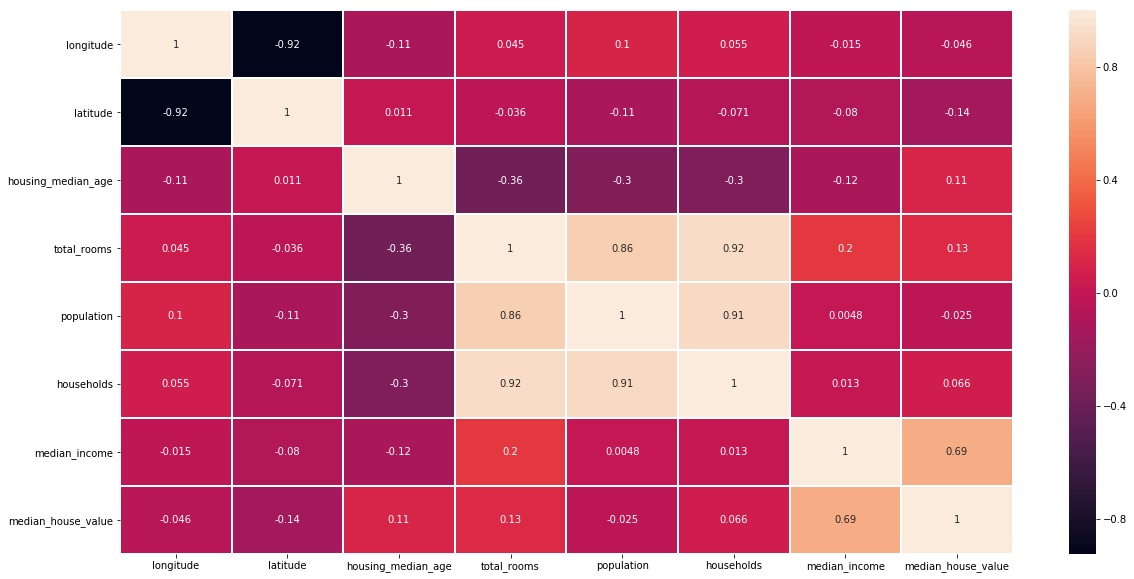

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, linecolor='white', linewidths=1)
plt.show()

In [15]:
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Perfoming Bi-Variate analysis on Ocean Proximity and Median House Value

In [16]:
unique_ocean_proximity_values = data['ocean_proximity'].value_counts()
unique_ocean_proximity_values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

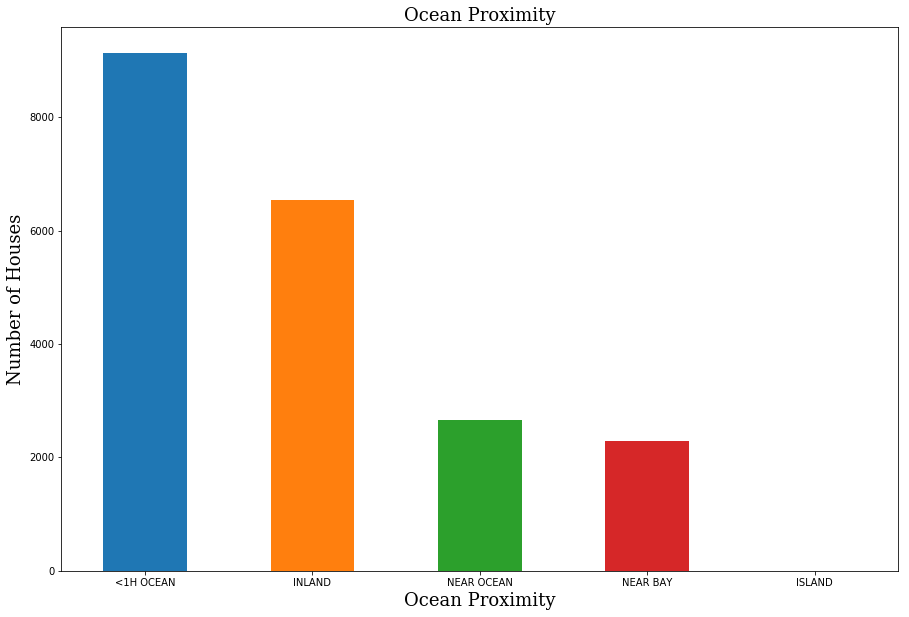

In [17]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(15, 10))
unique_ocean_proximity_values.plot.bar()
plt.xlabel('Ocean Proximity', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Number of Houses', fontdict=font_dict)
plt.title('Ocean Proximity', fontdict=font_dict)
plt.savefig('Visualization/House-Location.png')
plt.show()

### Let's see how the mean value of the house is in different locations.

In [18]:
mean_house_price_location = data.groupby(['ocean_proximity'])['median_house_value'].mean()
mean_house_price_location

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [19]:
mean_house_price_location.sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

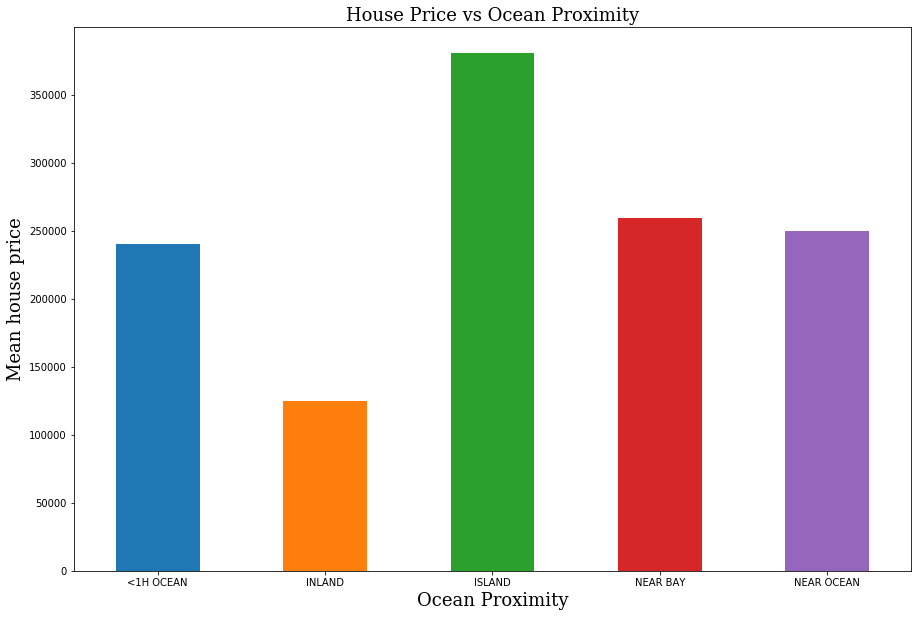

In [20]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(15, 10))
mean_house_price_location.plot.bar()
plt.xlabel('Ocean Proximity', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Mean house price', fontdict=font_dict)
plt.title('House Price vs Ocean Proximity', fontdict=font_dict)
plt.savefig('Visualization/House-Price-vs-Ocean-Proximity.png')
plt.show()

## Getting our data ready for Machine Learning processing

In [21]:
new_data = data[['longitude','latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income']]

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


#### Checking if our data contains any null values.

In [23]:
new_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
dtype: int64

#### As there are no null values in our data and we have removed categorical data, we can move forwared with Machine Learning prediction - Regression Type.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
output_data = data['median_house_value']

In [26]:
X, x_test, Y, y_test = train_test_split(new_data, output_data, test_size=0.2, random_state=42)

In [27]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,874.0,380.0,3.5542


In [28]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,1063.0,428.0,3.7250


In [29]:
X.shape

(16512, 7)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_regression_model = LinearRegression()

In [32]:
linear_regression_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income'],
      dtype='object')

In [34]:
sample_prediction = linear_regression_model.predict([[-116.05,32.75,36.0,2024.0,1030.0,390.0,3.8233]])

In [35]:
sample_prediction

array([189252.38692174])

In [36]:
linear_prediction = linear_regression_model.predict(x_test)

In [37]:
linear_prediction

array([ 58963.79919708, 178872.10191219, 319660.25412472, ...,
       443374.42840775, 138268.12934552, 173596.56568812])

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [39]:
linear_rmse = np.sqrt(mean_squared_error(linear_prediction, y_test))
linear_rmse

70517.83385628034

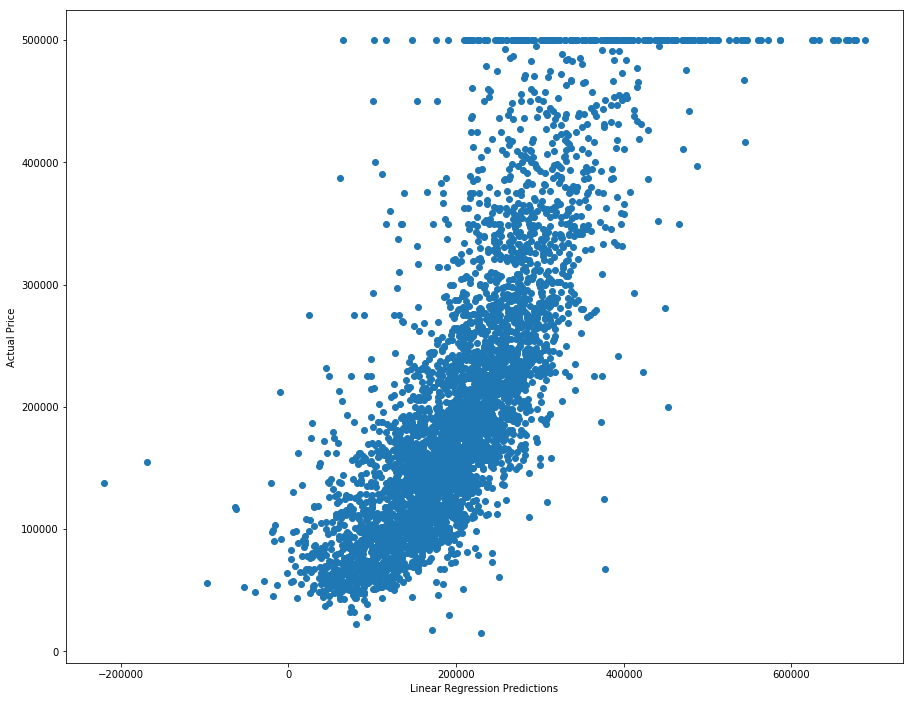

In [40]:
plt.figure(figsize=(15, 12))
plt.scatter(linear_prediction, y_test)
plt.xlabel('Linear Regression Predictions')
plt.ylabel('Actual Price')
plt.show()

## Overfitting

![data](Overfitting.gif)

## Regularization

In [41]:
linear_regression_model.coef_

array([-4.18304502e+04, -4.21259255e+04,  1.14901492e+03, -1.77739567e+00,
       -4.30549706e+01,  1.50053689e+02,  3.86142793e+04])

In [42]:
coeff_data = pd.DataFrame(linear_regression_model.coef_, X.columns)
coeff_data

,0
longitude,-41830.450249
latitude,-42125.925477
housing_median_age,1149.014918
total_rooms,-1.777396
population,-43.054971
households,150.053689
median_income,38614.279289


In [69]:
linear_house_prediction = linear_regression_model.predict([[-118.37, 34.22, 17.0, 1787.0, 1671.0, 448.0, 2.5521]])
linear_house_prediction

array([134982.28639937])

In [44]:
linear_model_coeff = pd.Series(linear_regression_model.coef_, X.columns)

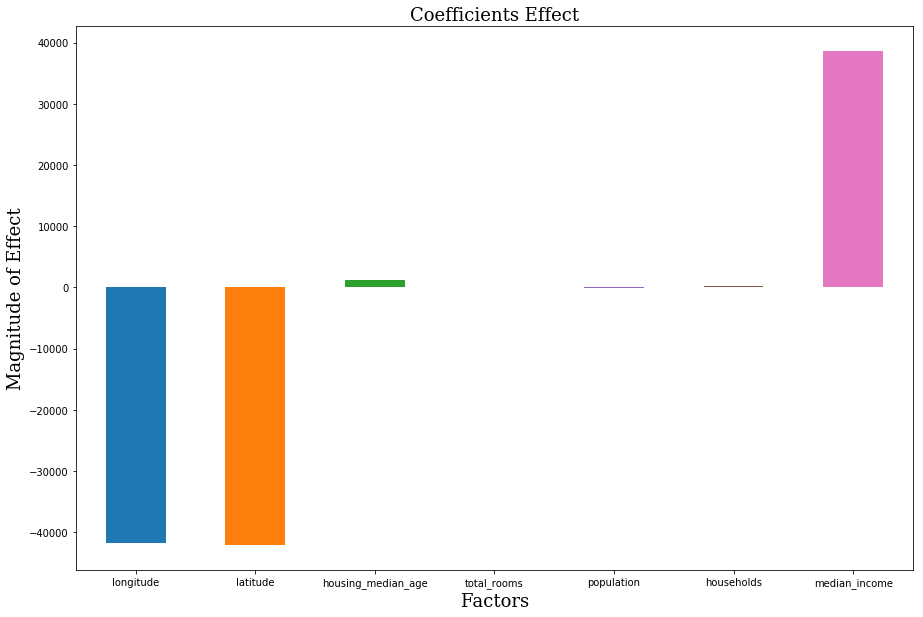

In [45]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(15, 10))
linear_model_coeff.plot(kind='bar')
plt.xlabel('Factors', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Magnitude of Effect', fontdict=font_dict)
plt.title('Coefficients Effect', fontdict=font_dict)
plt.show()

### Types of Regression which uses Regularization

### Ridge Regression : Performs L2 Regularization

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge_model = Ridge(alpha=0.05, normalize=True)

In [48]:
ridge_model.fit(X, Y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [49]:
ridge_prediction = ridge_model.predict(x_test)

In [68]:
ridge_prediction_single_house = ridge_model.predict([[-118.37, 34.22, 17.0, 1787.0, 1671.0, 448.0, 2.5521]])
ridge_prediction_single_house

array([134749.59837783])

In [51]:
ridge_rmse = np.sqrt(mean_squared_error(ridge_prediction, y_test))
ridge_rmse

72213.2207636259

In [52]:
ridge_coeff_data = pd.DataFrame(ridge_model.coef_, X.columns)
ridge_coeff_data

,0
longitude,-24751.782293
latitude,-25784.244851
housing_median_age,1383.104225
total_rooms,0.666468
population,-28.008156
households,95.496993
median_income,38154.672698


In [53]:
ridge_model_coeff = pd.Series(ridge_model.coef_, X.columns)

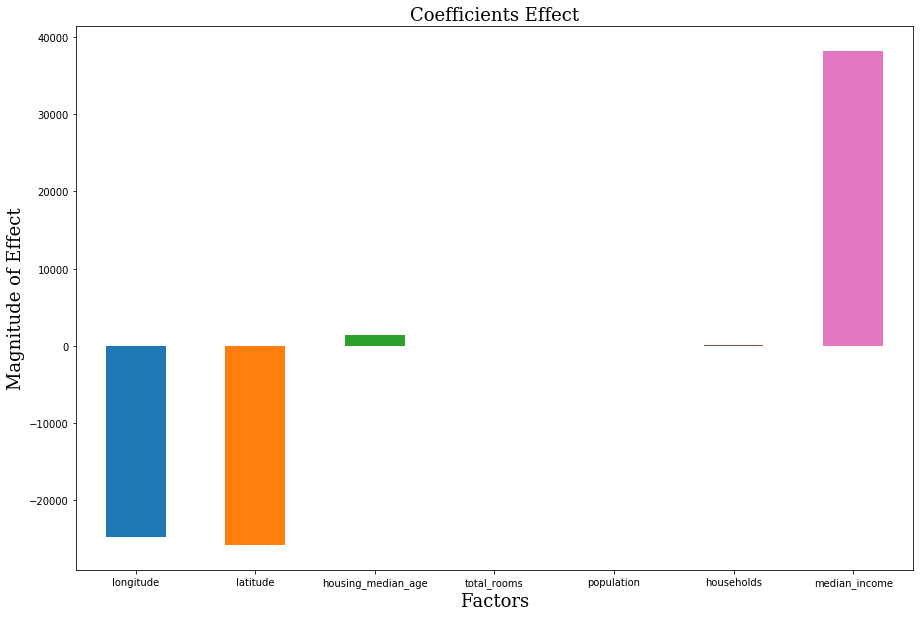

In [54]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(15, 10))
ridge_model_coeff.plot(kind='bar')
plt.xlabel('Factors', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Magnitude of Effect', fontdict=font_dict)
plt.title('Coefficients Effect', fontdict=font_dict)
plt.show()

### Lasso Regression : L1 Regularization

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso_regression_model = Lasso(alpha=0.3, normalize=True)

In [57]:
lasso_regression_model.fit(X, Y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso_prediction = lasso_regression_model.predict(x_test)

In [59]:
lasso_prediction_single_house = lasso_regression_model.predict([[-118.37, 34.22, 17.0, 1787.0, 1671.0, 448.0, 3.5521]])
lasso_prediction_single_house

array([173545.89386616])

In [60]:
lasso_coeff_data = pd.DataFrame(lasso_regression_model.coef_, X.columns)
lasso_coeff_data

,0
longitude,-41636.275748
latitude,-41943.226415
housing_median_age,1151.216456
total_rooms,-1.550064
population,-42.760684
households,148.001208
median_income,38568.039897


In [61]:
lasso_model_coeff = pd.Series(lasso_regression_model.coef_, X.columns)
lasso_model_coeff

longitude            -41636.275748
latitude             -41943.226415
housing_median_age     1151.216456
total_rooms              -1.550064
population              -42.760684
households              148.001208
median_income         38568.039897
dtype: float64

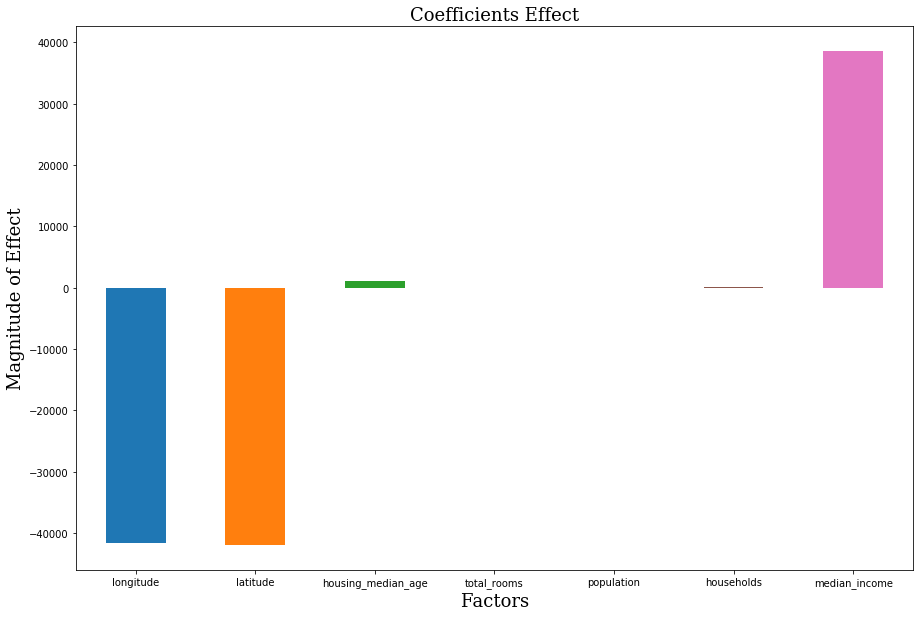

In [62]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(15, 10))
lasso_model_coeff.plot(kind='bar')
plt.xlabel('Factors', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Magnitude of Effect', fontdict=font_dict)
plt.title('Coefficients Effect', fontdict=font_dict)
plt.show()

In [63]:
lasso_rmse = np.sqrt(mean_squared_error(lasso_prediction, y_test))
lasso_rmse

70518.25655608326

### Computing the error for all the different regression techniques

In [64]:
error_dict = {}
error_dict['Linear Regression'] = linear_rmse
error_dict['Ridge Regression'] = ridge_rmse
error_dict['Lasso Regression'] = lasso_rmse
error_dict

{'Linear Regression': 70517.83385628034,
 'Ridge Regression': 72213.2207636259,
 'Lasso Regression': 70518.25655608326}

In [65]:
error_data = pd.DataFrame.from_dict(error_dict, orient='index', columns=['Error'])
error_data

,Error
Linear Regression,70517.833856
Ridge Regression,72213.220764
Lasso Regression,70518.256556
